In [1]:
import tensorflow as tf # Import tensorflow library
import matplotlib.pyplot as plt # Import matplotlib library
#import tensorflow_datasets as tfds
import numpy as np
from emnist import extract_training_samples, extract_test_samples

In [5]:
characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M'
              ,'N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j'
              ,'k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [6]:
x_train, y_train = extract_training_samples('byclass')
x_test, y_test =extract_test_samples('byclass')
x_train.shape

(697932, 28, 28)

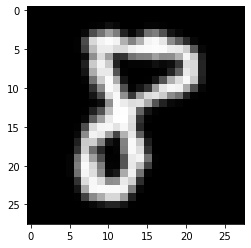

In [4]:
plt.imshow(x_train[112], cmap="gray") # Import the image
plt.show() # Plot the image

In [5]:
# Normalize the train dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
# Normalize the test dataset
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(62, activation=tf.nn.softmax))

In [7]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [8]:
model.fit(x=x_train, y=y_train, epochs=20) # Start training process

Train on 697932 samples
Epoch 1/20
697932/697932 [==============================] - 57s 82us/sample - loss: 0.6283 - accuracy: 0.7949
Epoch 2/20
697932/697932 [==============================] - 56s 80us/sample - loss: 0.4846 - accuracy: 0.8317
Epoch 3/20
697932/697932 [==============================] - 56s 80us/sample - loss: 0.4573 - accuracy: 0.8392
Epoch 4/20
697932/697932 [==============================] - 56s 80us/sample - loss: 0.4424 - accuracy: 0.8430
Epoch 5/20
697932/697932 [==============================] - 56s 80us/sample - loss: 0.4317 - accuracy: 0.8460
Epoch 6/20
697932/697932 [==============================] - 56s 80us/sample - loss: 0.4248 - accuracy: 0.8476
Epoch 7/20
697932/697932 [==============================] - 56s 80us/sample - loss: 0.4188 - accuracy: 0.8487
Epoch 8/20
697932/697932 [==============================] - 56s 80us/sample - loss: 0.4149 - accuracy: 0.8505
Epoch 9/20
697932/697932 [==============================] - 56s 80us/sample - loss: 0.4121 - acc

In [9]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)

# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Test accuracy: 0.834951


In [10]:
predictions = model.predict([x_test])
# Make prediction

In [11]:
print(characters[np.argmax(predictions[13421])])# Print out the number

e


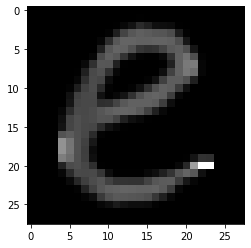

In [12]:
plt.imshow(x_test[13421], cmap="gray") # Import the image
plt.show() # Show the image

In [13]:
# Saving the model
from tensorflow.keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#saves the model info as json file
    
model.save_weights("model.h5")

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('model.h5')

model = loaded_model


print('Model successfully loaded')

Model successfully loaded


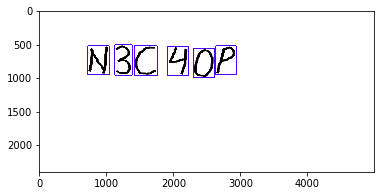

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


#enter input image here
image = cv2.imread('test2.png')
height, width, depth = image.shape

#resizing the image to find spaces better
image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)
#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#dilation
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)

#adding GaussianBlur
gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)

#find contours
ctrs, hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

m = list()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
pchl = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(dp,(x-5,y-5),( x + w + 10, y + h + 10 ),(80,0,255),11)
    
plt.imshow(dp)

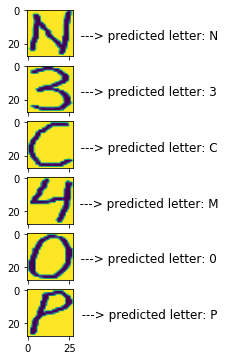

Predicted String: N3CM0P


In [23]:
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    # Getting ROI
    roi = image[y-10:y+h+10, x-10:x+w+10]
    roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    
    roi = np.array(roi)
    t = np.copy(roi)
    t = t / 255.0
    t = 1-t
    t = t.reshape(1,784)
    m.append(roi)
    pred = model.predict_classes(t)
    pchl.append(pred)

    

pcw = list()
interp = 'bilinear'
fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))
for i in range(len(pchl)):
    #print (pchl[i][0])
    pcw.append(characters[pchl[i][0]])
    axs[i].set_title('   ---> predicted letter: '+characters[pchl[i][0]], x=2.5,y=0.24)
    axs[i].imshow(m[i], interpolation=interp)

plt.show()


predstring = ''.join(pcw)
print('Predicted String: '+predstring)